## **Logistic regression**

Import useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

import joblib

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
np.set_printoptions(precision=2, suppress=True)

### **3. Preparing the Data**

In [4]:
%store -r df

In [5]:
df.head()

,a1,a2,a3,a4,a5,a6,d1,d2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


**Identify predictors and response variable**

In [6]:
df.columns

Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2'], dtype='object')

In [7]:
predictors_list = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']

In [8]:
X = df[predictors_list].values
y = df[['d1']].values

**Split data in training set and test set**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
X_train.shape, X_test.shape

((96, 6), (24, 6))

**Data standardisation**

In [11]:
ss = MinMaxScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

### **4. Training the Model**

Linear regression model fit on data

In [12]:
lr = LogisticRegression(n_jobs=-1, random_state=42)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

In [13]:
lr.intercept_

array([-1.51])

In [14]:
lr.coef_

array([[-0.89,  1.  , -2.09,  2.96,  2.08, -0.36]])

In [15]:
y_pred_proba = lr.predict_proba(X=X_test)
y_pred_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### **5. Evaluating the Model**

**Computation of classificaton metrics**

Classification report

In [16]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Confusion matrix

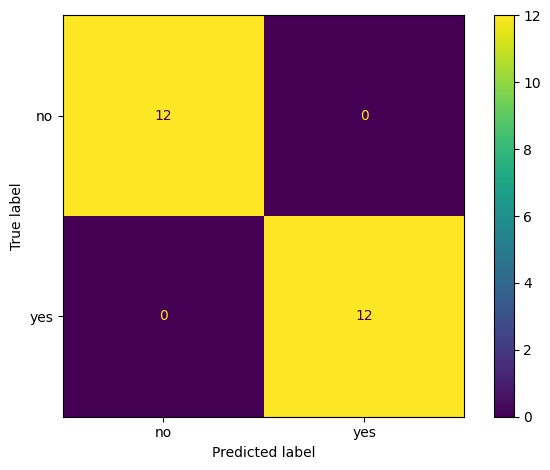

In [17]:
ConfusionMatrixDisplay.from_estimator(estimator=lr, X=X_test_std, y=y_test, display_labels=['no', 'yes'])
plt.tight_layout()
plt.show()

### **6. Model deployment**

Model serialization


In [18]:
joblib.dump(value=lr, filename="models/d1_model.joblib")

['models/d1_model.joblib']